Exercise 3 sẽ chia làm 2 bài:
- Ex3 (chưa qua bước pre-processing data) và 
- Ex3 (đã qua bước pre-processing data).

So sánh accuracy.



---
##EXERCISE 3: Not pre-processing data (ignore STEP 1 in Part B)


#**A. Read and view dataset**

In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/Py4DS/Py4DS_Lab3/Py4DS_Lab3_Dataset/FIFA2018Statistics.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0



#**B. Processing data**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

#**STEP 1: Pre-processing data** ==> Ignore

#**STEP 2: EDA** (Explotary Data Analysis)

##**0.Summary-statistic**

In [54]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


##**1. Biểu đồ cột - histogram.**  (Feature: 'Fouls Committed')

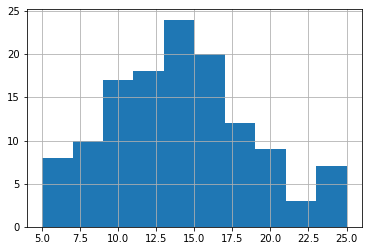

In [55]:
df['Fouls Committed'].hist(bins = 10)

**Comomments:**

Trục tung y_axis đếm số dữ liệu rơi vào cột nào đó (chính là 1 khoảng của trục hoành x_axis).


Trong 128 đội có:
- 24 đội: phạm lỗi khoảng [13,15] lần ==> Đây là vùng số lỗi có nhiều quốc gia phạm phải nhất.  Chiếm khoảng 19%
- 3 đội: phạm lỗi khoảng [21,13] lần 




##**2. Box-plot.  Biểu đồ hình hộp**  (Feature: 'Yellow Card')

count    128.000000
mean       1.695312
std        1.325454
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: Yellow Card, dtype: float64


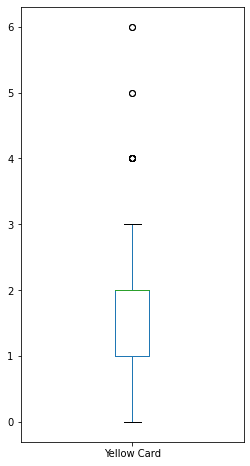

In [56]:
df['Yellow Card'].plot(kind = 'box', figsize = (4, 8));
print(df['Yellow Card'].describe())

**Comments:**

Feature 'Yellow Card' has outliers


##**3. Heat-map. Biểu đồ nhiệt.**

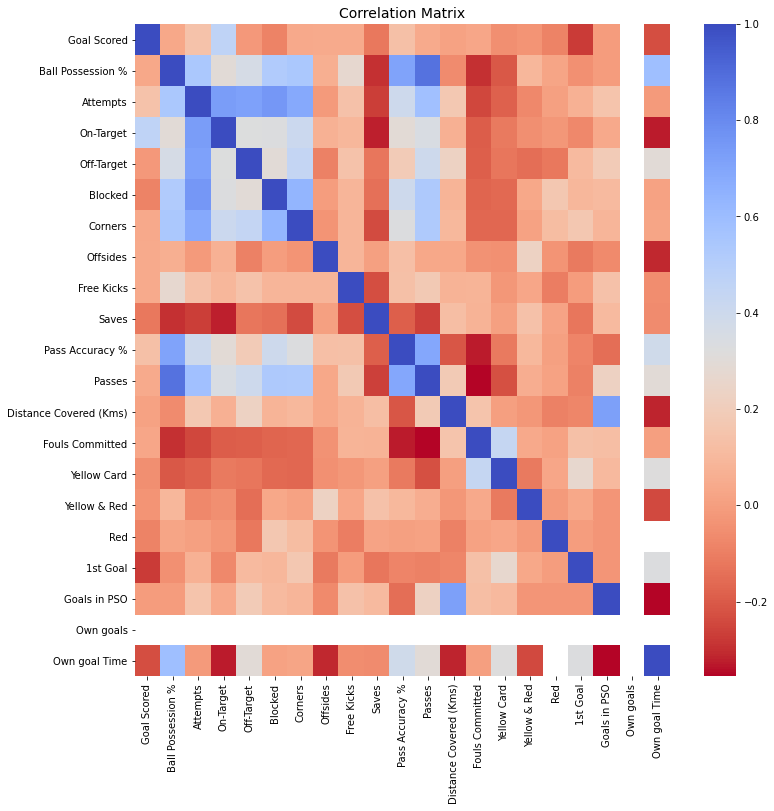

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14);

#**C. Train-Test**

**Xử lý các dữ liệu category**

In [58]:
cleaned_data  = pd.get_dummies(df)
cleaned_data.shape

(128, 120)

**Chuyển hóa Encoder**

In [59]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,7,23,24,5,11,10,7,2,3,6,3,5,0,8,15,26,17,0,0,0,1,8,2,0,0,25,35
1,7,24,23,0,31,3,0,2,3,2,1,19,2,16,68,15,5,0,0,0,0,68,2,0,0,83,93
2,9,8,31,0,14,5,3,2,2,0,1,2,3,8,40,22,7,2,0,0,0,67,2,0,0,82,92
3,9,31,8,1,28,11,4,5,4,5,1,7,3,16,86,21,1,0,0,0,1,54,2,0,0,81,91
4,9,17,13,0,35,10,3,5,4,5,0,8,2,16,49,11,17,1,0,0,0,83,2,0,0,0,10


##**1. Tách dữ liệu**


In [60]:
X = df.drop(['Man of the Match'], axis = 1)
y = df['Man of the Match']

##**2. Train - Test**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#**D. Choose model**

##**1. Model: Support Vector Machine (SVM)**

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf_svm = SVC(kernel = 'poly', C = 10)   
clf_svm.fit(X_train, y_train)

print("Support Vector Machine")
print("\ntrain accuracy: ", accuracy_score(y_train, clf_svm.predict(X_train)))
print("test accuracy: ", accuracy_score(y_test, clf_svm.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf_svm.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf_svm.predict(X_test), digits = 5))

Support Vector Machine

train accuracy:  0.803921568627451
test accuracy:  0.5769230769230769

Confusion matrix : 
 [[ 5  6]
 [ 5 10]]
Classification report : 
               precision    recall  f1-score   support

           0    0.50000   0.45455   0.47619        11
           1    0.62500   0.66667   0.64516        15

    accuracy                        0.57692        26
   macro avg    0.56250   0.56061   0.56068        26
weighted avg    0.57212   0.57692   0.57367        26



##**2. Model: Decision Tree Classifier**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print("Decision Tree Classifier")
print("\ntrain accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acccuracy: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Decision Tree Classifier

train accuracy:  1.0
test acccuracy:  0.6538461538461539

Confusion matrix : 
 [[8 3]
 [6 9]]
Classification report : 
               precision    recall  f1-score   support

           0    0.57143   0.72727   0.64000        11
           1    0.75000   0.60000   0.66667        15

    accuracy                        0.65385        26
   macro avg    0.66071   0.66364   0.65333        26
weighted avg    0.67445   0.65385   0.65538        26



##**3. Model: Random Forest Classifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

print("Random Forest Classifier")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Random Forest Classifier

train acc:  1.0
test acc:  0.6538461538461539

Confusion matrix : 
 [[8 3]
 [6 9]]
Classification report : 
               precision    recall  f1-score   support

           0    0.57143   0.72727   0.64000        11
           1    0.75000   0.60000   0.66667        15

    accuracy                        0.65385        26
   macro avg    0.66071   0.66364   0.65333        26
weighted avg    0.67445   0.65385   0.65538        26



##**4. Model: Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = LogisticRegression(max_iter = len(y_train))
clf.fit(X_train,y_train)

print("Logistic Regression")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Logistic Regression

train acc:  0.7647058823529411
test acc:  0.5769230769230769

Confusion matrix : 
 [[7 4]
 [7 8]]
Classification report : 
               precision    recall  f1-score   support

           0    0.50000   0.63636   0.56000        11
           1    0.66667   0.53333   0.59259        15

    accuracy                        0.57692        26
   macro avg    0.58333   0.58485   0.57630        26
weighted avg    0.59615   0.57692   0.57880        26



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




---
#EXERCISE 3: Having pre-processing data 


#**A. Read and view dataset**

In [66]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/Py4DS/Py4DS_Lab3/Py4DS_Lab3_Dataset/FIFA2018Statistics.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


#**B. Processing data**

##**STEP 1: Pre-processing data**

##**1. Kiểm tra data cơ bản  &  Remove missing values** (Loại bỏ các giá trị khuyết)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

##**2. Drop Duplicates**  (Loại bỏ các giá trị trùng)

In [68]:
N = len(df)  # Count the number of rows in data
print(N)     

df.drop_duplicates(inplace = True) # df after dropping duplicates
print("The new dimension after checking duplicate & removing is:\t (%s, %s)"%(df.shape)) #size of data (rows,columns)
print('There are %s observations is duplicated, take %s percentage on total dataset'%(N - len(df), 
                                                                                      round(100*(N - len(df))/N, 2)))

128
The new dimension after checking duplicate & removing is:	 (128, 27)
There are 0 observations is duplicated, take 0.0 percentage on total dataset


**Comments:**

Có thể thấy, ban đầu có 128 dữ liệu, sau bước Dropping Duplicates còn  128 dữ liệu. Tức không có dữ liệu trùng

##**3. Remove outliers** (Loại bỏ các giá trị ngoại lai))

In [69]:
### Tìm IQR của dữ liệu
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
## Loại bỏ outlier
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]
df.shape

(128, 27)

**Comments:**
  - After dropping duplicates, the size of data: (128,27).
  
  i.e 128 rows, 27 columns
  - After removing outliers, the size of data is (128,27). 

  i.e data không thay đổi  ==>  Data không có outliers

##**4. Drop column according to NAN percentage for dataframe**

In [77]:
df=df = df.loc[:, df.isnull().mean() < .8] # remove all columns has values which be NAN accounting for >= 80%

df.shape

(128, 25)

#**STEP 2: EDA** (Explotary Data Analysis)

##**0.Summary-statistic**

In [78]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO
count,127.000000,128.000000,123.000000,126.000000,128.000000,118.000000,127.000000,128.000000,128.000000,125.000000,128.000000,127.000000,116.000000,128.000000,116.000000,126.0,126.0,94.000000,120.0
mean,1.283465,49.992188,12.065041,3.801587,5.273438,2.889831,4.669291,1.343750,14.890625,2.576000,82.554688,457.338583,104.163793,13.546875,1.405172,0.0,0.0,39.457447,0.0
std,1.083041,10.444074,4.628387,2.059203,2.409675,1.834074,2.390640,1.193404,4.724262,1.823962,5.933766,139.288055,5.641375,4.619131,0.986680,0.0,0.0,24.496506,0.0
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,89.000000,5.000000,0.000000,0.0,0.0,1.000000,0.0
25%,0.000000,42.000000,8.500000,2.000000,4.000000,1.000000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.0,0.0,18.250000,0.0
50%,1.000000,50.000000,12.000000,3.000000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.000000,13.000000,1.000000,0.0,0.0,39.000000,0.0
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,553.500000,107.250000,16.000000,2.000000,0.0,0.0,54.750000,0.0
max,5.000000,75.000000,24.000000,9.000000,11.000000,7.000000,10.000000,5.000000,26.000000,8.000000,94.000000,805.000000,118.000000,25.000000,3.000000,0.0,0.0,90.000000,0.0


##**1. Biểu đồ cột - histogram.**  (Feature: 'Fouls Committed')

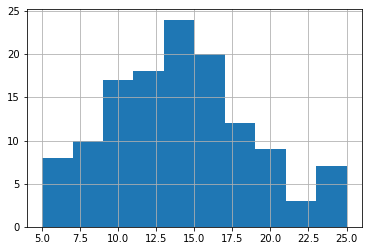

In [79]:
df['Fouls Committed'].hist(bins = 10)

##**2. Box-plot.  Biểu đồ hình hộp**  (Feature: 'Yellow Card')

count    116.000000
mean       1.405172
std        0.986680
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Yellow Card, dtype: float64


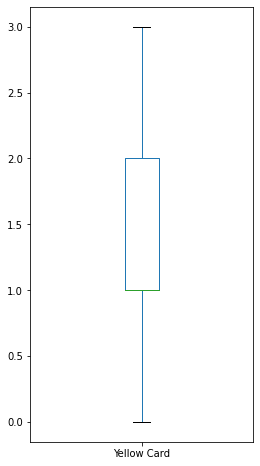

In [80]:
df['Yellow Card'].plot(kind = 'box', figsize = (4, 8));
print(df['Yellow Card'].describe())

**Comment**
After removing outliers (Section 3 in STEP 1), data has NO outliers.

##**3. Heat-map. Biểu đồ nhiệt.**

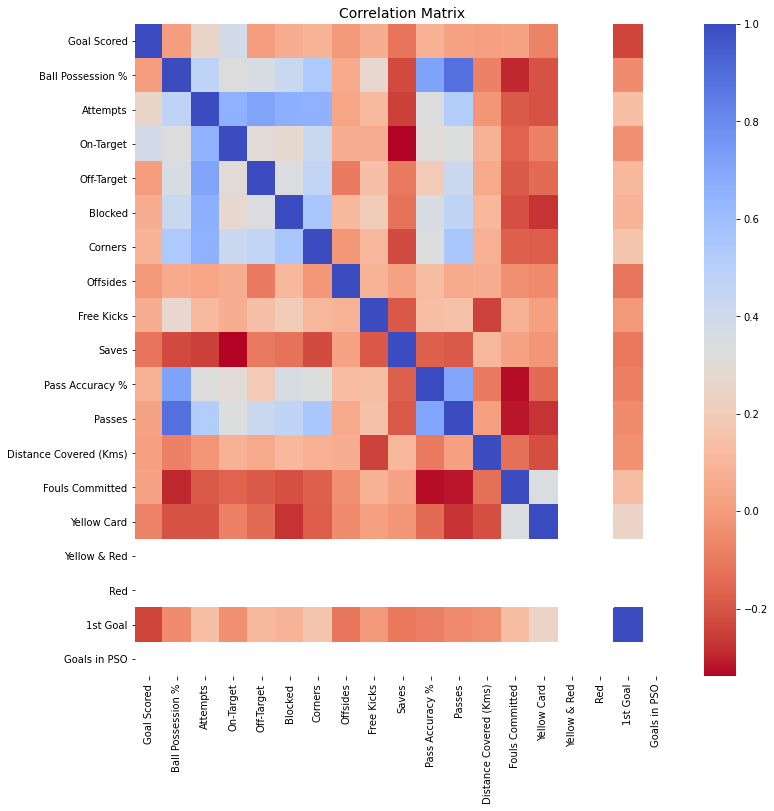

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14);

#**C. Train-Test**

In [82]:
cleaned_data  = pd.get_dummies(df)
cleaned_data.shape

(128, 118)

In [83]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO
0,7,23,24,5,11,10,7,2,3,6,3,5,0,8,15,24,17,0,0,0,1,8,2,0,0
1,7,24,23,0,31,3,0,2,3,2,1,19,2,16,68,13,5,0,0,0,0,68,2,0,0
2,9,8,31,0,14,5,3,2,2,0,1,2,3,8,40,20,7,2,0,0,0,67,2,0,0
3,9,31,8,1,28,11,4,5,4,5,1,7,3,16,86,19,1,0,0,0,1,54,2,0,0
4,9,17,13,0,35,10,3,5,4,5,0,8,2,16,49,9,17,1,0,0,0,83,2,0,0


##**1. Tách dữ liệu**

In [86]:
X = df.drop(['Man of the Match'], axis = 1)
y = df['Man of the Match']

##**2. Train - Test**

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#**D. Choose model**

##**1. Model: Support Vector Machine (SVM)**

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf_svm = SVC(kernel = 'poly', C = 10)   
clf_svm.fit(X_train, y_train)

print("Support Vector Machine")
print("\ntrain accuracy: ", accuracy_score(y_train, clf_svm.predict(X_train)))
print("test accuracy: ", accuracy_score(y_test, clf_svm.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf_svm.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf_svm.predict(X_test), digits = 5))

Support Vector Machine

train accuracy:  0.7941176470588235
test accuracy:  0.6923076923076923

Confusion matrix : 
 [[ 4  7]
 [ 1 14]]
Classification report : 
               precision    recall  f1-score   support

           0    0.80000   0.36364   0.50000        11
           1    0.66667   0.93333   0.77778        15

    accuracy                        0.69231        26
   macro avg    0.73333   0.64848   0.63889        26
weighted avg    0.72308   0.69231   0.66026        26



##**2. Model: Decision Tree Classifier**

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print("Decision Tree Classifier")
print("\ntrain accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acccuracy: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Decision Tree Classifier

train accuracy:  1.0
test acccuracy:  0.46153846153846156

Confusion matrix : 
 [[ 7  4]
 [10  5]]
Classification report : 
               precision    recall  f1-score   support

           0    0.41176   0.63636   0.50000        11
           1    0.55556   0.33333   0.41667        15

    accuracy                        0.46154        26
   macro avg    0.48366   0.48485   0.45833        26
weighted avg    0.49472   0.46154   0.45192        26



##**3. Model: Random Forest Classifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

print("Random Forest Classifier")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Random Forest Classifier

train acc:  1.0
test acc:  0.6538461538461539

Confusion matrix : 
 [[8 3]
 [6 9]]
Classification report : 
               precision    recall  f1-score   support

           0    0.57143   0.72727   0.64000        11
           1    0.75000   0.60000   0.66667        15

    accuracy                        0.65385        26
   macro avg    0.66071   0.66364   0.65333        26
weighted avg    0.67445   0.65385   0.65538        26



##**4. Model: Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = LogisticRegression(max_iter = len(y_train))
clf.fit(X_train,y_train)

print("Logistic Regression")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Logistic Regression

train acc:  0.7941176470588235
test acc:  0.6923076923076923

Confusion matrix : 
 [[9 2]
 [6 9]]
Classification report : 
               precision    recall  f1-score   support

           0    0.60000   0.81818   0.69231        11
           1    0.81818   0.60000   0.69231        15

    accuracy                        0.69231        26
   macro avg    0.70909   0.70909   0.69231        26
weighted avg    0.72587   0.69231   0.69231        26



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
